---
# **PODCAST LISTENING TIME PREDICTION**
---

* **FRAMING THE PROBLEM**

This is a Kaggle Competition in which we have to predict podcast listening based on the data.

* **EVALUATION METRICS**

RMSE is used as an evaluation metrics.

# IMPORT LIBRARIES

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

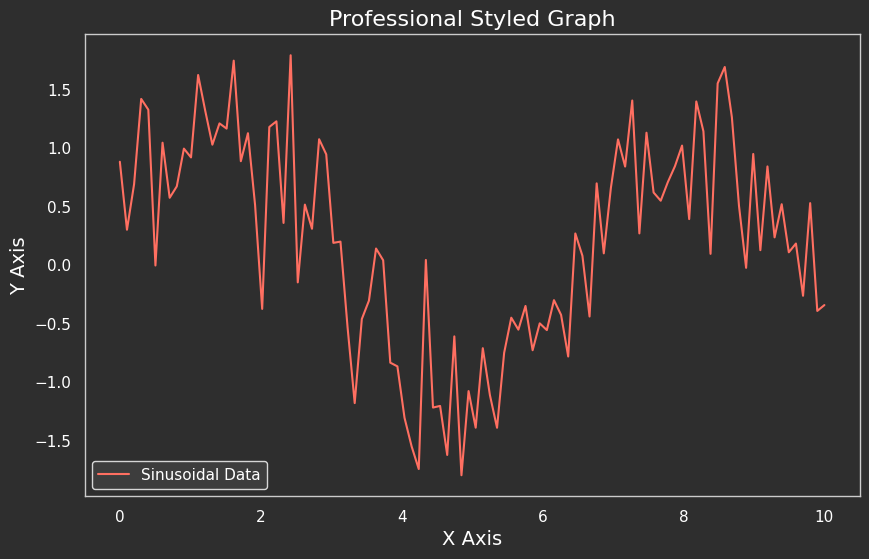

In [ ]:
# Set Seaborn theme with a dark style and a bright color palette.
sns.set_theme(style="dark", palette="bright")

# Use a dark background for the figure but adjust colors for contrast.
plt.style.use('dark_background')

# Customize Matplotlib parameters for a refined, professional look.
plt.rcParams.update({
    'axes.edgecolor': '#CCCCCC',      # Light grey borders for axes.
    'axes.linewidth': 1.0,
    'axes.facecolor': '#2E2E2E',      # A slightly lighter dark grey background.
    'figure.facecolor': '#2E2E2E',    # Figure background.
    'grid.color': '#555555',          # Moderate grey grid lines.
    'grid.linestyle': '--',
    'grid.linewidth': 0.7,
    'font.size': 12,
    'axes.labelcolor': '#FFFFFF',     # White axis labels.
    'xtick.color': '#FFFFFF',         # White tick labels.
    'ytick.color': '#FFFFFF',
    'legend.edgecolor': '#FFFFFF',
    'legend.facecolor': '#424242',    # Darker grey legend background.
    'savefig.facecolor': '#2E2E2E',   # Save figures with dark background.
    'savefig.edgecolor': '#2E2E2E'
})

# Create sample data for demonstration.
np.random.seed(0)
x = np.linspace(0, 10, 100)
y = np.sin(x) + np.random.normal(scale=0.5, size=len(x))

# Create the plot.
fig, ax = plt.subplots(figsize=(10, 6))
# Use a bright color (e.g., coral) for the line to enhance contrast.
sns.lineplot(x=x, y=y, ax=ax, label="Sinusoidal Data", color="#FF6F61")
ax.set_title("Professional Styled Graph", fontsize=16)
ax.set_xlabel("X Axis", fontsize=14)
ax.set_ylabel("Y Axis", fontsize=14)
ax.legend()

# Display the plot.
plt.show()

# Data's Summay statistics

In [ ]:
class data_info:
  def __init__(self, link):
    try:
      self.__data = pd.read_csv(link)
    except Exception as e:
      print(e)

  def get_data(self):
    return self.__data

  def get_BasicInfo(self):
    return  print(f'{self.get_data().info()} \n The shape of data is :{self.get_data().shape}' )

  def get_summary_stats(self):
    return self.get_data().describe()

  def show_nulls(self):
    return self.get_data().isnull().sum()

  def handle_nulls(self):
    '''
    this function detect null values for column type int float and object and doesn't account for datetime columns.
    as it return the dataframe, you should store it in a variable to see changes.
    we'll not apply this function on the dataset coz we're going to fill values in pipeline using simple?KNN imputer
     '''
    isna = self.get_data.isnull().sum().sum()
    if isna:
      for col in self.__data.columns:
        if self.get_data()[col].hasnans:
          if self.__data[col].dtype == object:
            self.__data[col] = self.__data[col].fillna(self.__data[col].mode())
          if self.__data[col].dtype == int or self.__data[col].dtype == float:
            self.__data[col] = self.__data[col].fillna(self.__data[col].median())
        else:
          continue
    else:
      return
    return self.__data

  def call_all(self):
    '''
    calls all non returnable functions
    '''
    self.get_BasicInfo()
    self.get_summary_stats()


  def show_category_counts(self):
    '''
    prints the category counts for each categorical columns
    '''
    x = [col for col in self.__data.columns if self.__data[col].dtype == object]
    for i in x:
      cats = self.get_data()[i].nunique()
      print(f'total unique values in column {i} is {cats}\n')
      cats = 0



In [ ]:
di = data_info('/content/drive/MyDrive/Kaggle Competition Datasets/podcast_train.csv')
train = di.get_data()
test = pd.read_csv('/content/drive/MyDrive/Kaggle Competition Datasets/podcast_test.csv')

In [ ]:
di.get_BasicInfo()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750000 entries, 0 to 749999
Data columns (total 12 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           750000 non-null  int64  
 1   Podcast_Name                 750000 non-null  object 
 2   Episode_Title                750000 non-null  object 
 3   Episode_Length_minutes       662907 non-null  float64
 4   Genre                        750000 non-null  object 
 5   Host_Popularity_percentage   750000 non-null  float64
 6   Publication_Day              750000 non-null  object 
 7   Publication_Time             750000 non-null  object 
 8   Guest_Popularity_percentage  603970 non-null  float64
 9   Number_of_Ads                749999 non-null  float64
 10  Episode_Sentiment            750000 non-null  object 
 11  Listening_Time_minutes       750000 non-null  float64
dtypes: float64(5), int64(1), object(6)
memory usage: 68.7+ MB


In [ ]:
di.get_summary_stats()

,id,Episode_Length_minutes,Host_Popularity_percentage,Guest_Popularity_percentage,Number_of_Ads,Listening_Time_minutes
count,750000.000000,662907.000000,750000.000000,603970.000000,749999.000000,750000.000000
mean,374999.500000,64.504738,59.859901,52.236449,1.348855,45.437406
std,216506.495284,32.969603,22.873098,28.451241,1.151130,27.138306
min,0.000000,0.000000,1.300000,0.000000,0.000000,0.000000
25%,187499.750000,35.730000,39.410000,28.380000,0.000000,23.178350
50%,374999.500000,63.840000,60.050000,53.580000,1.000000,43.379460
75%,562499.250000,94.070000,79.530000,76.600000,2.000000,64.811580
max,749999.000000,325.240000,119.460000,119.910000,103.910000,119.970000


In [ ]:
di.show_nulls()

,0
id,0
Podcast_Name,0
Episode_Title,0
Episode_Length_minutes,87093
Genre,0
Host_Popularity_percentage,0
Publication_Day,0
Publication_Time,0
Guest_Popularity_percentage,146030
Number_of_Ads,1


In [ ]:
train.head()

,id,Podcast_Name,Episode_Title,Episode_Length_minutes,Genre,Host_Popularity_percentage,Publication_Day,Publication_Time,Guest_Popularity_percentage,Number_of_Ads,Episode_Sentiment,Listening_Time_minutes
0,0,Mystery Matters,Episode 98,NaN,True Crime,74.81,Thursday,Night,NaN,0.0,Positive,31.41998
1,1,Joke Junction,Episode 26,119.80,Comedy,66.95,Saturday,Afternoon,75.95,2.0,Negative,88.01241
2,2,Study Sessions,Episode 16,73.90,Education,69.97,Tuesday,Evening,8.97,0.0,Negative,44.92531
3,3,Digital Digest,Episode 45,67.17,Technology,57.22,Monday,Morning,78.70,2.0,Positive,46.27824
4,4,Mind & Body,Episode 86,110.51,Health,80.07,Monday,Afternoon,58.68,3.0,Neutral,75.61031


In [ ]:
di.show_category_counts()

total unique values in column Podcast_Name is 48

total unique values in column Episode_Title is 100

total unique values in column Genre is 10

total unique values in column Publication_Day is 7

total unique values in column Publication_Time is 4

total unique values in column Episode_Sentiment is 3



In [ ]:
train.drop(columns = ['id'], inplace = True)

# EDA

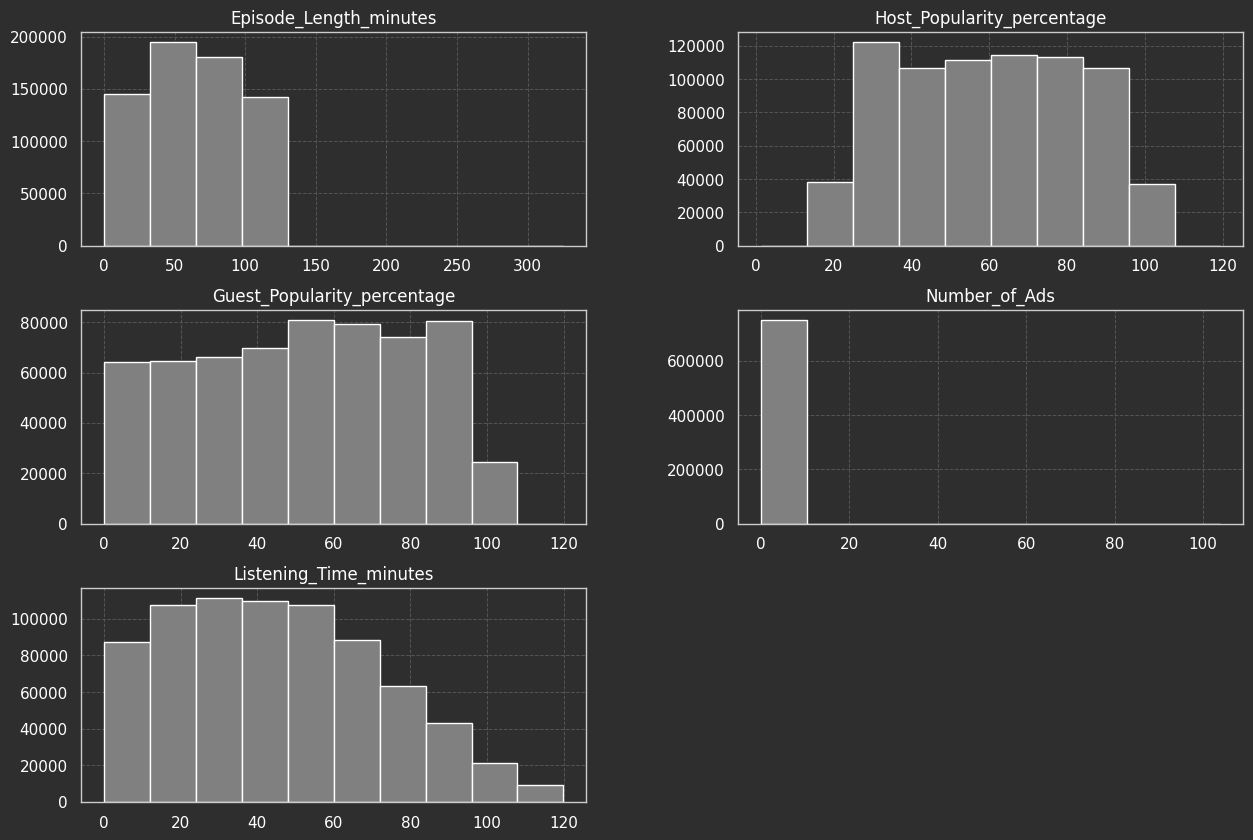

In [ ]:
# plt.figure()
train.hist(figsize = (15,10), color = 'grey')
plt.show()

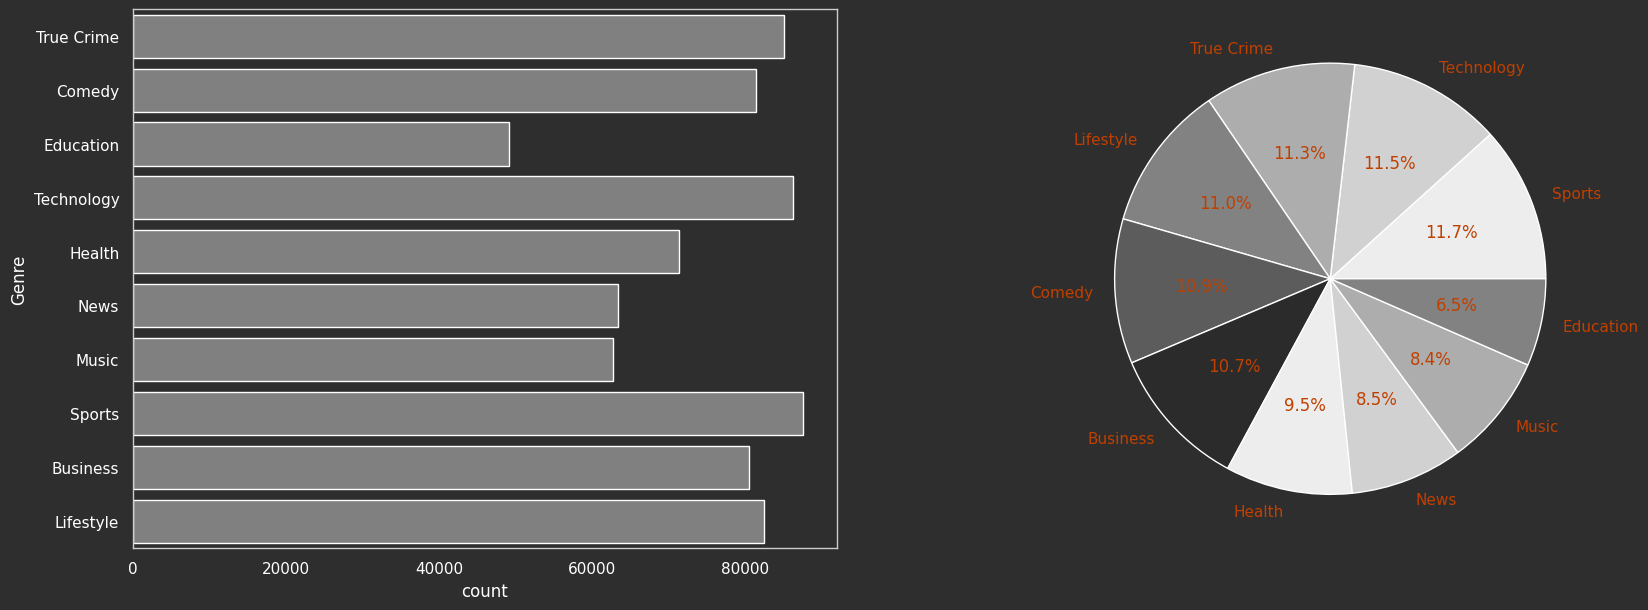

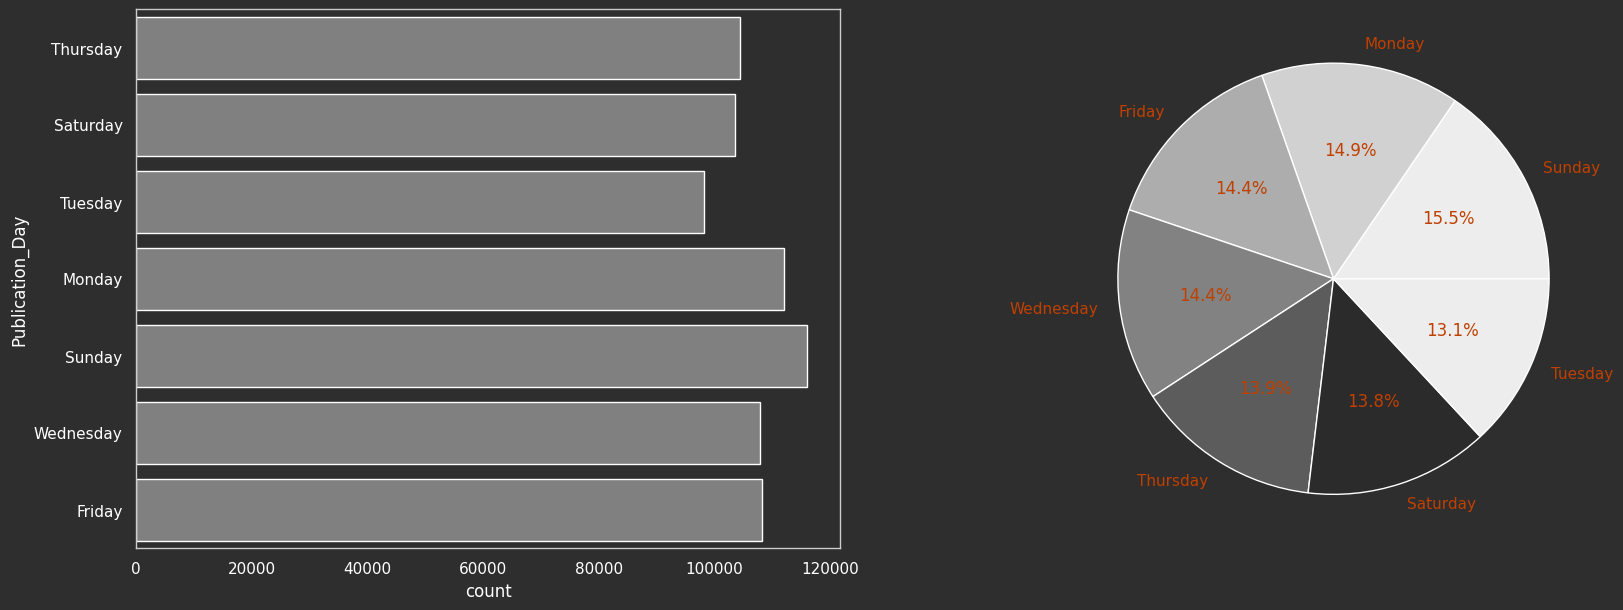

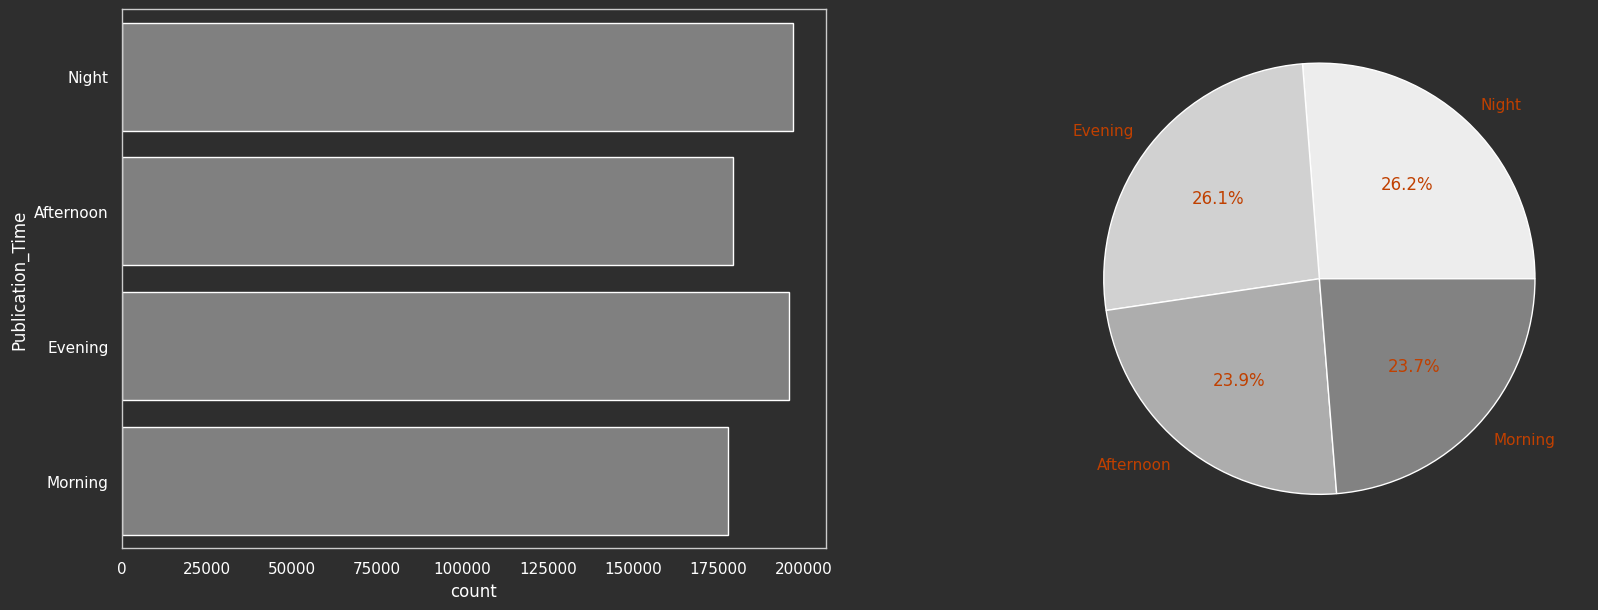

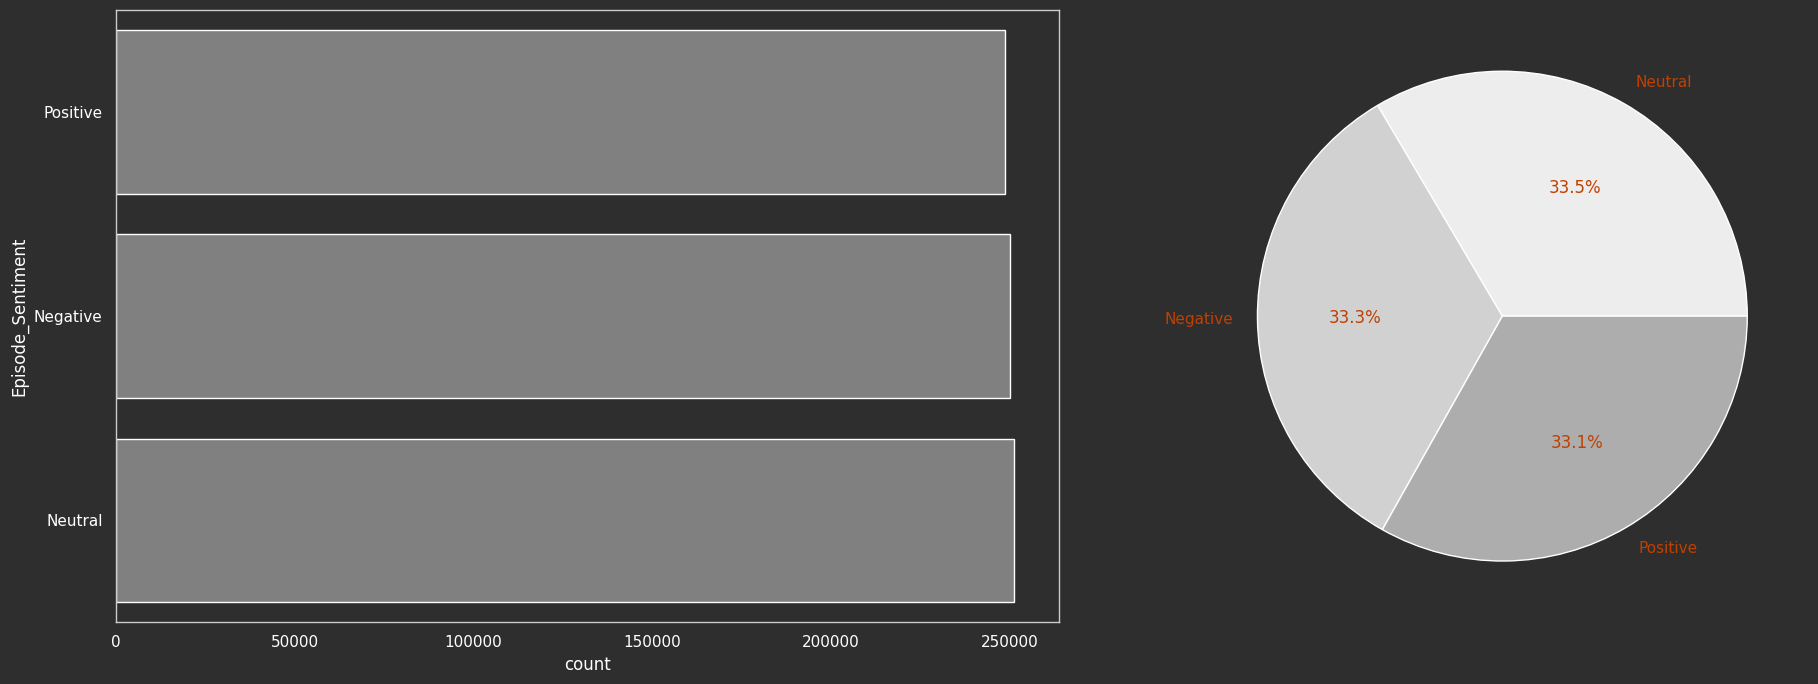

In [ ]:
x = ['Genre',
 'Publication_Day',
 'Publication_Time',
 'Episode_Sentiment']
colors = sns.color_palette("Greys")
for i in x:
  fig, ax = plt.subplots(1,2, figsize = (20,7))
  sns.countplot(train[i], ax = ax[0], color = 'grey')
  pct = (train[i].value_counts() / train[i].value_counts().sum()) * 100
  ax[1].pie(pct, autopct='%0.1f%%', labels = pct.index, textprops = dict(color = '#C04000'), colors= colors)
plt.tight_layout()
plt.show()

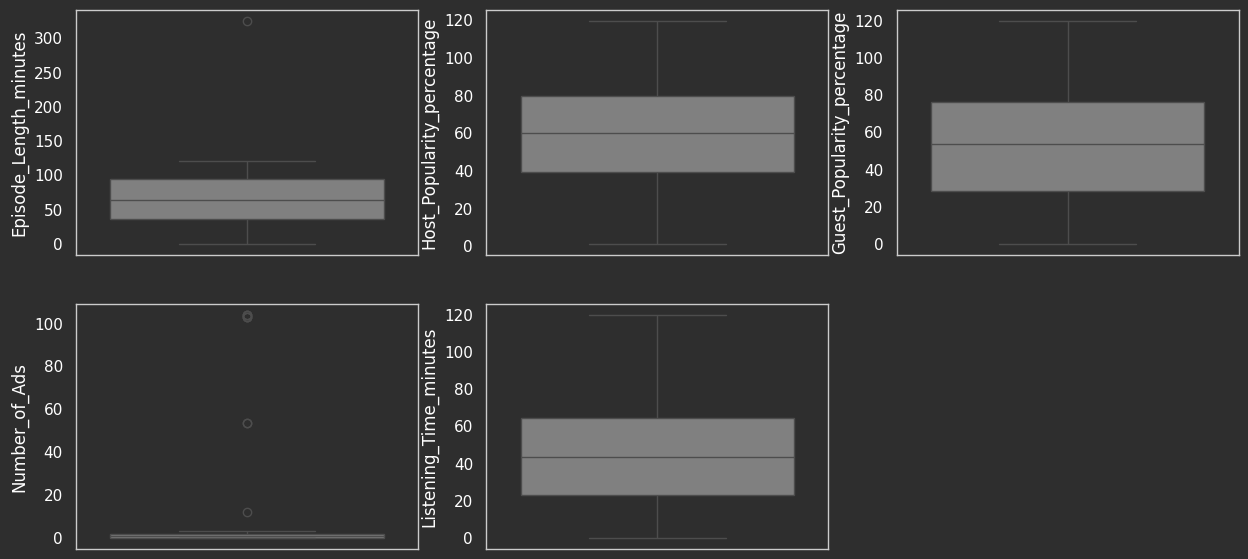

In [ ]:
y= [col for col in train.columns if (train[col].dtype == int) | (train[col].dtype == float)]
plt.figure(figsize = (15,7))
for i in enumerate(y):
  plt.subplot(2,3, i[0]+1)
  sns.boxplot(train[i[1]], color = 'grey')

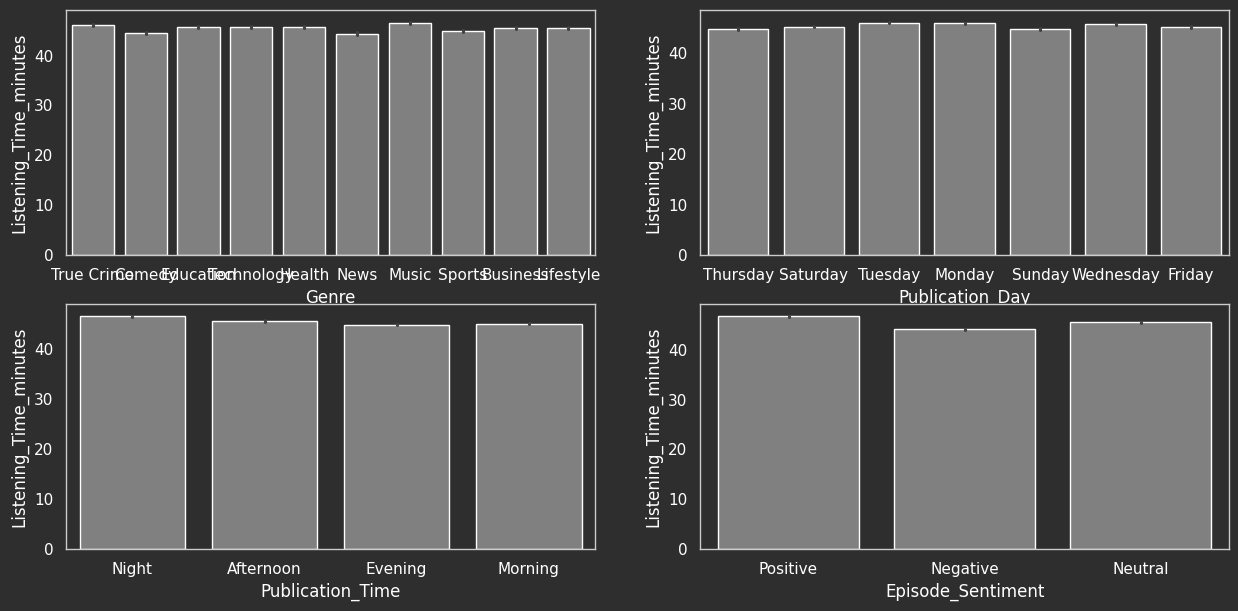

In [ ]:
plt.figure(figsize = (15,7))
for i in enumerate(x):
  plt.subplot(2,2,i[0]+1)
  sns.barplot(data = train, x= train[i[1]], y = 'Listening_Time_minutes', color = 'grey')

So almost everything are uniform with respect to listening time.

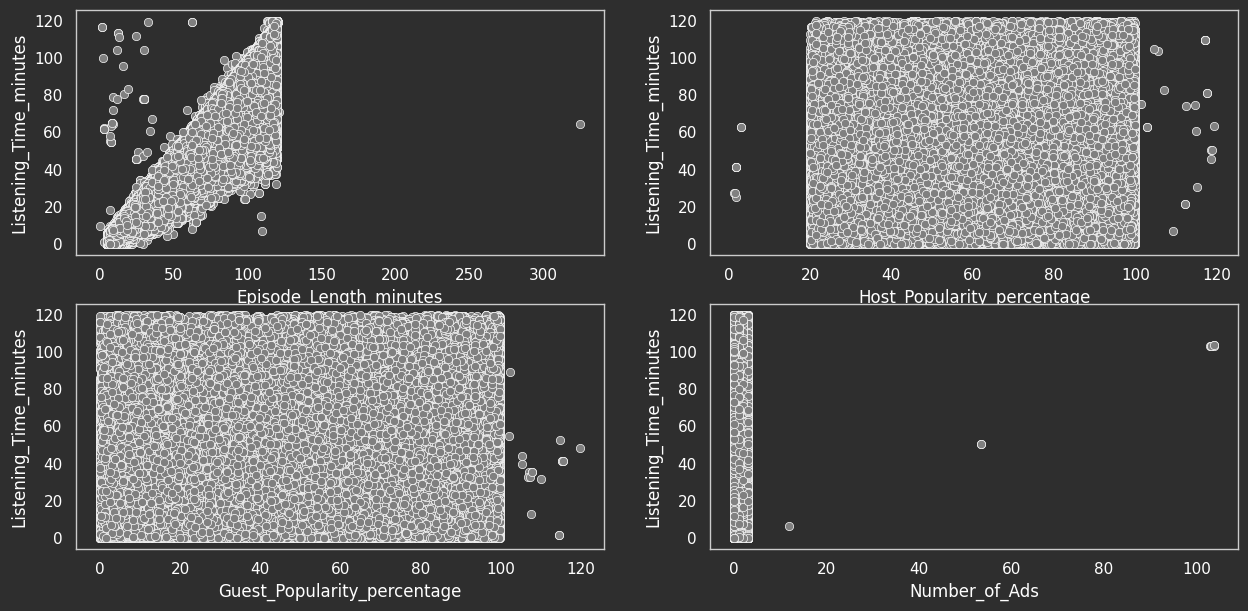

In [ ]:
ynew = y.copy()
ynew.remove('Listening_Time_minutes')
plt.figure(figsize = [15,7])
for i in enumerate(ynew):
  plt.subplot(2,2,i[0]+1)
  sns.scatterplot(x = train[i[1]], y = train['Listening_Time_minutes'], color = 'grey')

corrupt values in number_pf_ads, do filter the dataset.

In [ ]:
train = train[train['Number_of_Ads'] <= 3]

In [ ]:
m = train[train['Episode_Length_minutes']> 300].index

In [ ]:
train.drop(m, inplace=True)

<ipython-input-18-3d7537aba107>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train.drop(m, inplace=True)


# Feature Engineering

In [ ]:
train1 = train.copy()
test1 = test.copy()

find avg listening time of genres.

find avg listening of podcast name, publication day, publication time.

bin ep length.

ads density.

popularity ratio.

In [ ]:
#Popularity ratio
train1['Popularity_ratio'] = (train1['Host_Popularity_percentage'].fillna(train1['Host_Popularity_percentage'].median())) / (train1['Guest_Popularity_percentage'].fillna(train1['Guest_Popularity_percentage'].median())+ 1e-6)
test['Popularity_ratio'] = (test1['Host_Popularity_percentage'].fillna(test1['Host_Popularity_percentage'].median())) / (test1['Guest_Popularity_percentage'].fillna(test1['Guest_Popularity_percentage'].median()) +1e-6)

In [ ]:
# Ads Density
train1['Ads_density'] = train1['Number_of_Ads']/(train1['Episode_Length_minutes'].fillna(train1['Episode_Length_minutes'].median()) + 1e-6)
test1['Ads_density'] = test1['Number_of_Ads']/(test1['Episode_Length_minutes'].fillna(test1['Episode_Length_minutes'].median()) + 1e-6)

In [ ]:
bins = [0,10,30,60, float('inf')]
labels = ['Short', 'Medium', 'Long', 'Very Long']
train1['ep_length'] = pd.cut(train1['Episode_Length_minutes'].fillna(train1['Episode_Length_minutes'].median()) , bins=bins, labels=labels, include_lowest=True)
test1['ep_length'] = pd.cut(test1['Episode_Length_minutes'].fillna(test1['Episode_Length_minutes'].median()) , bins=bins, labels=labels, include_lowest=True)

<Axes: >

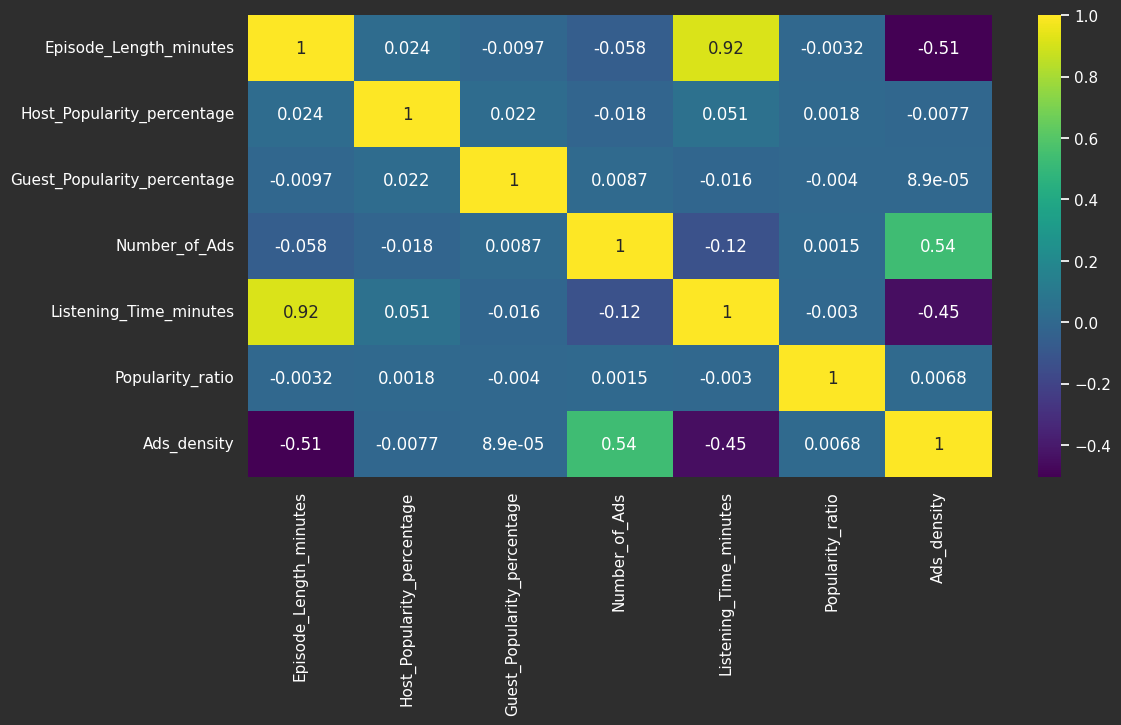

In [ ]:
mask = [col for col in train1 if (train1[col].dtype == int ) | (train1[col].dtype == float )]
plt.figure(figsize = (12,6))
sns.heatmap(train1[mask].corr(), annot=True, cmap = 'viridis')

In [ ]:
!pip install statsmodels
from statsmodels.stats.outliers_influence import variance_inflation_factor

features = ["Episode_Length_minutes", "Number_of_Ads", "Ads_density"]
vif_data = pd.DataFrame()
vif_data["Feature"] = features
vif_data["VIF"] = [variance_inflation_factor(train1[features].fillna(train1[features].mean()).values, i) for i in range(len(features))]
print(vif_data)

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 103.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.9/232.9 kB 16.8 MB/s eta 0:00:00
                  Feature       VIF
0  Episode_Length_minutes  2.091210
1           Number_of_Ads  3.763646
2             Ads_density  2.232436


# Model Building

##**Model building without encoding 'podcast name'**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, OrdinalEncoder
from sklearn.impute import KNNImputer, SimpleImputer
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, VotingRegressor, GradientBoostingRegressor, VotingRegressor
from sklearn.metrics import mean_squared_error

In [ ]:
train1.drop(columns=['Podcast_Name', 'Episode_Title'], inplace = True)

In [ ]:
X = train1.drop(columns=['Listening_Time_minutes'])
y = train1['Listening_Time_minutes']

xtrain, xtest, ytrain, ytest = train_test_split(X,y, test_size=0.2, random_state=42)

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 749989 entries, 0 to 749999
Data columns (total 11 columns):
 #   Column                       Non-Null Count   Dtype   
---  ------                       --------------   -----   
 0   Episode_Length_minutes       662896 non-null  float64 
 1   Genre                        749989 non-null  object  
 2   Host_Popularity_percentage   749989 non-null  float64 
 3   Publication_Day              749989 non-null  object  
 4   Publication_Time             749989 non-null  object  
 5   Guest_Popularity_percentage  603961 non-null  float64 
 6   Number_of_Ads                749989 non-null  float64 
 7   Episode_Sentiment            749989 non-null  object  
 8   Popularity_ratio             749989 non-null  float64 
 9   Ads_density                  749989 non-null  float64 
 10  ep_length                    749989 non-null  category
dtypes: category(1), float64(6), object(4)
memory usage: 63.7+ MB


In [ ]:
tnf1 = ColumnTransformer([
    ('imputer1', SimpleImputer(), [0]),
    ('ohe1', OneHotEncoder(sparse_output=False, drop='first', handle_unknown='ignore'), [1]),
    ('pass1', 'passthrough', [2]),
    ('ohe2', OneHotEncoder(sparse_output=False, drop='first', handle_unknown='ignore'), [3,4]),
    ('imputer2', SimpleImputer() , [5]),
    ('pass2', 'passthrough', [6]),
    ('ord_enc1', OrdinalEncoder(categories=[['Negative', 'Neutral', 'Positive']]), [7]),
    ('pass3', 'passthrough', [8,9]),
    ('ord_enc2', OrdinalEncoder(categories=[['Short', 'Medium', 'Long', 'Very Long']]), [10])
])

In [ ]:
pipe = Pipeline([
    ('tnf', tnf1),
    ('scaler', MinMaxScaler()),
    ('model', DecisionTreeRegressor(max_depth=8))
])

pipe.fit(xtrain, ytrain)

Pipeline(steps=[('tnf',
                 ColumnTransformer(transformers=[('imputer1', SimpleImputer(),
                                                  [0]),
                                                 ('ohe1',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse_output=False),
                                                  [1]),
                                                 ('pass1', 'passthrough', [2]),
                                                 ('ohe2',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse_output=False),
                                                  [3, 4]),
                                                 ('imputer2', SimpleImputer(),
                                                  [5]),
                                                 ('pass2', 'passthrough', [6]),
                                                 ('ord_enc1',
                                                  OrdinalEncoder(categories=[['Negative',
                                                                              'Neutral',
                                                                              'Positive']]),
                                                  [7]),
                                                 ('pass3', 'passthrough',
                                                  [8, 9]),
                                                 ('ord_enc2',
                                                  OrdinalEncoder(categories=[['Short',
                                                                              'Medium',
                                                                              'Long',
                                                                              'Very '
                                                                              'Long']]),
                                                  [10])])),
                ('scaler', MinMaxScaler()),
                ('model', DecisionTreeRegressor(max_depth=8))])

In [ ]:
ypred = pipe.predict(xtest)
mse = mean_squared_error(ytest, ypred)
rmse = np.sqrt(mse)
print(f' rmse of DT : {rmse}')

 rmse of DT : 13.137984872192122


In [ ]:
pipe2 = Pipeline([
    ('tnf', tnf1),
    ('scaler', MinMaxScaler()),
    ('model', RandomForestRegressor(n_estimators=50, max_depth=12))
])

pipe2.fit(xtrain, ytrain)

Pipeline(steps=[('tnf',
                 ColumnTransformer(transformers=[('imputer1', SimpleImputer(),
                                                  [0]),
                                                 ('ohe1',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse_output=False),
                                                  [1]),
                                                 ('pass1', 'passthrough', [2]),
                                                 ('ohe2',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse_output=False),
                                                  [3, 4]),
                                                 ('imputer2', SimpleImputer(),
                                                  [5]),
                                                 ('pass2', 'passthrough', [6]),
                                                 ('ord_enc1',
                                                  OrdinalEncoder(categories=[['Negative',
                                                                              'Neutral',
                                                                              'Positive']]),
                                                  [7]),
                                                 ('pass3', 'passthrough',
                                                  [8, 9]),
                                                 ('ord_enc2',
                                                  OrdinalEncoder(categories=[['Short',
                                                                              'Medium',
                                                                              'Long',
                                                                              'Very '
                                                                              'Long']]),
                                                  [10])])),
                ('scaler', MinMaxScaler()),
                ('model',
                 RandomForestRegressor(max_depth=12, n_estimators=60))])

In [ ]:
rfpred = pipe2.predict(xtest)
mse = mean_squared_error(ytest, rfpred)
np.sqrt(mse)

np.float64(13.00184165723505)

In [ ]:
pipe3 = Pipeline([
    ('tnf', tnf1),
    ('scaler', MinMaxScaler()),
    ('model', GradientBoostingRegressor(n_estimators=65, max_depth=12))
])

pipe3.fit(xtrain, ytrain)
gbpred = pipe3.predict(xtest)
mse = mean_squared_error(ytest, gbpred)
np.sqrt(mse)

np.float64(12.853564610119)

DT ---> 13.18 at maxdep = 12, 13.13 at maxdep = 8

RF ----> 13.109 ,|13.081 at maxdep = 9 and nestim = 50|, | maxdep = 12 , 13.00|

GB ----> 12.98 ......, nestim = 65, maxdep= 12,---> 12.85

In [ ]:
dt = DecisionTreeRegressor(max_depth=8)
rf = RandomForestRegressor(n_estimators=50, max_depth=12)
gb = GradientBoostingRegressor(n_estimators=65, max_depth=12)
pipe4 = Pipeline([
    ('tnf', tnf1),
    ('scaler', MinMaxScaler()),
    ('model', VotingRegressor([('dt', dt), ('rf', rf), ('gb', gb)]))
])

pipe4.fit(xtrain, ytrain)
vrpred = pipe4.predict(xtest)
mse = mean_squared_error(ytest, vrpred)
np.sqrt(mse)

np.float64(12.947454599660277)